In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
hf_df = pd.read_csv('ncr-health-facilities.csv')
# bicol_hf_df = pd.read_csv('bicol-health-facilities.csv')

# hf_df = pd.concat([ncr_hf_df, bicol_hf_df], axis=0)
pd.set_option('display.max_columns', None)
hf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 34 columns):
Health Facility Code                                      1143 non-null object
Health Facility Code Short                                1143 non-null int64
Facility Name                                             1143 non-null object
Old Health Facility Names                                 522 non-null object
Old Health Facility Name 2                                465 non-null object
Old Health Facility Name 3                                459 non-null object
Health Facility Type                                      1143 non-null object
Ownership Major Classification                            1143 non-null object
Ownership Sub-Classification for Government facilities    608 non-null object
Ownership Sub-Classification for private facilities       599 non-null object
Street Name and #                                         1022 non-null object
Building name and #           

In [4]:
hf_df['province_code'] = hf_df[hf_df.columns[15]]
hf_df['city_code'] = hf_df[hf_df.columns[17]]

# hf_df_count = hf_df.groupby(['municipality_code']).size().reset_index(name='count')
hf_df_cities = hf_df.groupby(['city_code', 'Health Facility Type']).size().reset_index(name='count')

In [5]:
ab_df = pd.read_excel('admin-boundaries.xlsx')
ab_df.head(25)

,OBJECTID *,Shape *,Shape_Length,Shape_Area,admin3Name_en,admin3Pcode *,admin3RefName,admin3AltName1_en,admin3AltName2_en,admin2Name_en,admin2Pcode,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,date,validOn,validTo
0,1,Polygon,1.601219,0.063496,Aborlan,PH175301000,<Null>,<Null>,<Null>,Palawan,PH175300000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
1,2,Polygon,1.078749,0.050232,Abra de Ilog,PH175101000,<Null>,<Null>,<Null>,Occidental Mindoro,PH175100000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
2,3,Polygon,0.424301,0.006453,Abucay,PH030801000,<Null>,<Null>,<Null>,Bataan,PH030800000,Region III,PH030000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
3,4,Polygon,0.566053,0.011343,Abulug,PH021501000,<Null>,<Null>,<Null>,Cagayan,PH021500000,Region II,PH020000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
4,5,Polygon,1.013649,0.026124,Abuyog,PH083701000,<Null>,<Null>,<Null>,Leyte,PH083700000,Region VIII,PH080000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
5,6,Polygon,0.423604,0.009506,Adams,PH012801000,<Null>,<Null>,<Null>,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
6,7,Polygon,0.314516,0.002976,Agdangan,PH045601000,<Null>,<Null>,<Null>,Quezon,PH045600000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
7,8,Polygon,1.125450,0.023714,Aglipay,PH025701000,<Null>,<Null>,<Null>,Quirino,PH025700000,Region II,PH020000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
8,9,Polygon,0.698457,0.014004,Agno,PH015501000,<Null>,<Null>,<Null>,Pangasinan,PH015500000,Region I,PH010000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>
9,10,Polygon,0.328783,0.004081,Agoncillo,PH041001000,<Null>,<Null>,<Null>,Batangas,PH041000000,Region IV-A,PH040000000,Philippines (the),PH,2016-06-30,2020-05-29,<Null>


In [6]:
gdf_cities = gpd.read_file('cities.shp')
gdf_cities.head(25)

,geometry
0,"MULTIPOLYGON (((118.58350 9.37700, 118.58398 9..."
1,"POLYGON ((120.58412 13.50198, 120.58420 13.501..."
2,"POLYGON ((120.49873 14.75614, 120.49891 14.755..."
3,"POLYGON ((121.43455 18.46651, 121.43502 18.466..."
4,"MULTIPOLYGON (((125.02684 10.73500, 125.02683 ..."
5,"POLYGON ((120.94626 18.51158, 120.96915 18.510..."
6,"MULTIPOLYGON (((121.94899 13.85130, 121.94889 ..."
7,"POLYGON ((121.63266 16.52720, 121.63520 16.522..."
8,"POLYGON ((119.77589 16.20436, 119.77800 16.203..."
9,"POLYGON ((120.95513 14.01682, 120.95581 14.014..."


In [7]:
def remove_code_prefix(value):
    return int(value[2:])

In [8]:
gdf_cities['city_code'] = ab_df['admin3Pcode *'].map(remove_code_prefix)
gdf_cities['province_code'] = ab_df['admin2Pcode'].map(remove_code_prefix)
gdf_cities = pd.merge(gdf_cities, hf_df_cities, on='city_code')
gdf_cities.head(25)

,geometry,city_code,province_code,Health Facility Type,count
0,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,General Clinic Laboratory,2
1,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,Hospital,1
2,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,Rural Health Unit,1
3,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Birthing Home,12
4,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,COVID-19 Testing Laboratory,3
5,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,General Clinic Laboratory,38
6,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Hospital,9
7,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Infirmary,4
8,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Rural Health Unit,46
9,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Social hygiene Clinic,1


In [9]:
gdf_provinces = gdf_cities.dissolve(by='province_code')

In [10]:
gdf_cities['centroid'] = gdf_cities.centroid
gdf_cities = gdf_cities.set_geometry('centroid')
gdf_cities.head(25)

,geometry,city_code,province_code,Health Facility Type,count,centroid
0,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,General Clinic Laboratory,2,POINT (120.97541 14.60108)
1,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,Hospital,1,POINT (120.97541 14.60108)
2,"POLYGON ((120.97738 14.60226, 120.97728 14.602...",133902000,133900000,Rural Health Unit,1,POINT (120.97541 14.60108)
3,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Birthing Home,12,POINT (121.02954 14.73009)
4,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,COVID-19 Testing Laboratory,3,POINT (121.02954 14.73009)
5,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,General Clinic Laboratory,38,POINT (121.02954 14.73009)
6,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Hospital,9,POINT (121.02954 14.73009)
7,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Infirmary,4,POINT (121.02954 14.73009)
8,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Rural Health Unit,46,POINT (121.02954 14.73009)
9,"MULTIPOLYGON (((121.01856 14.69176, 121.01867 ...",137501000,137500000,Social hygiene Clinic,1,POINT (121.02954 14.73009)


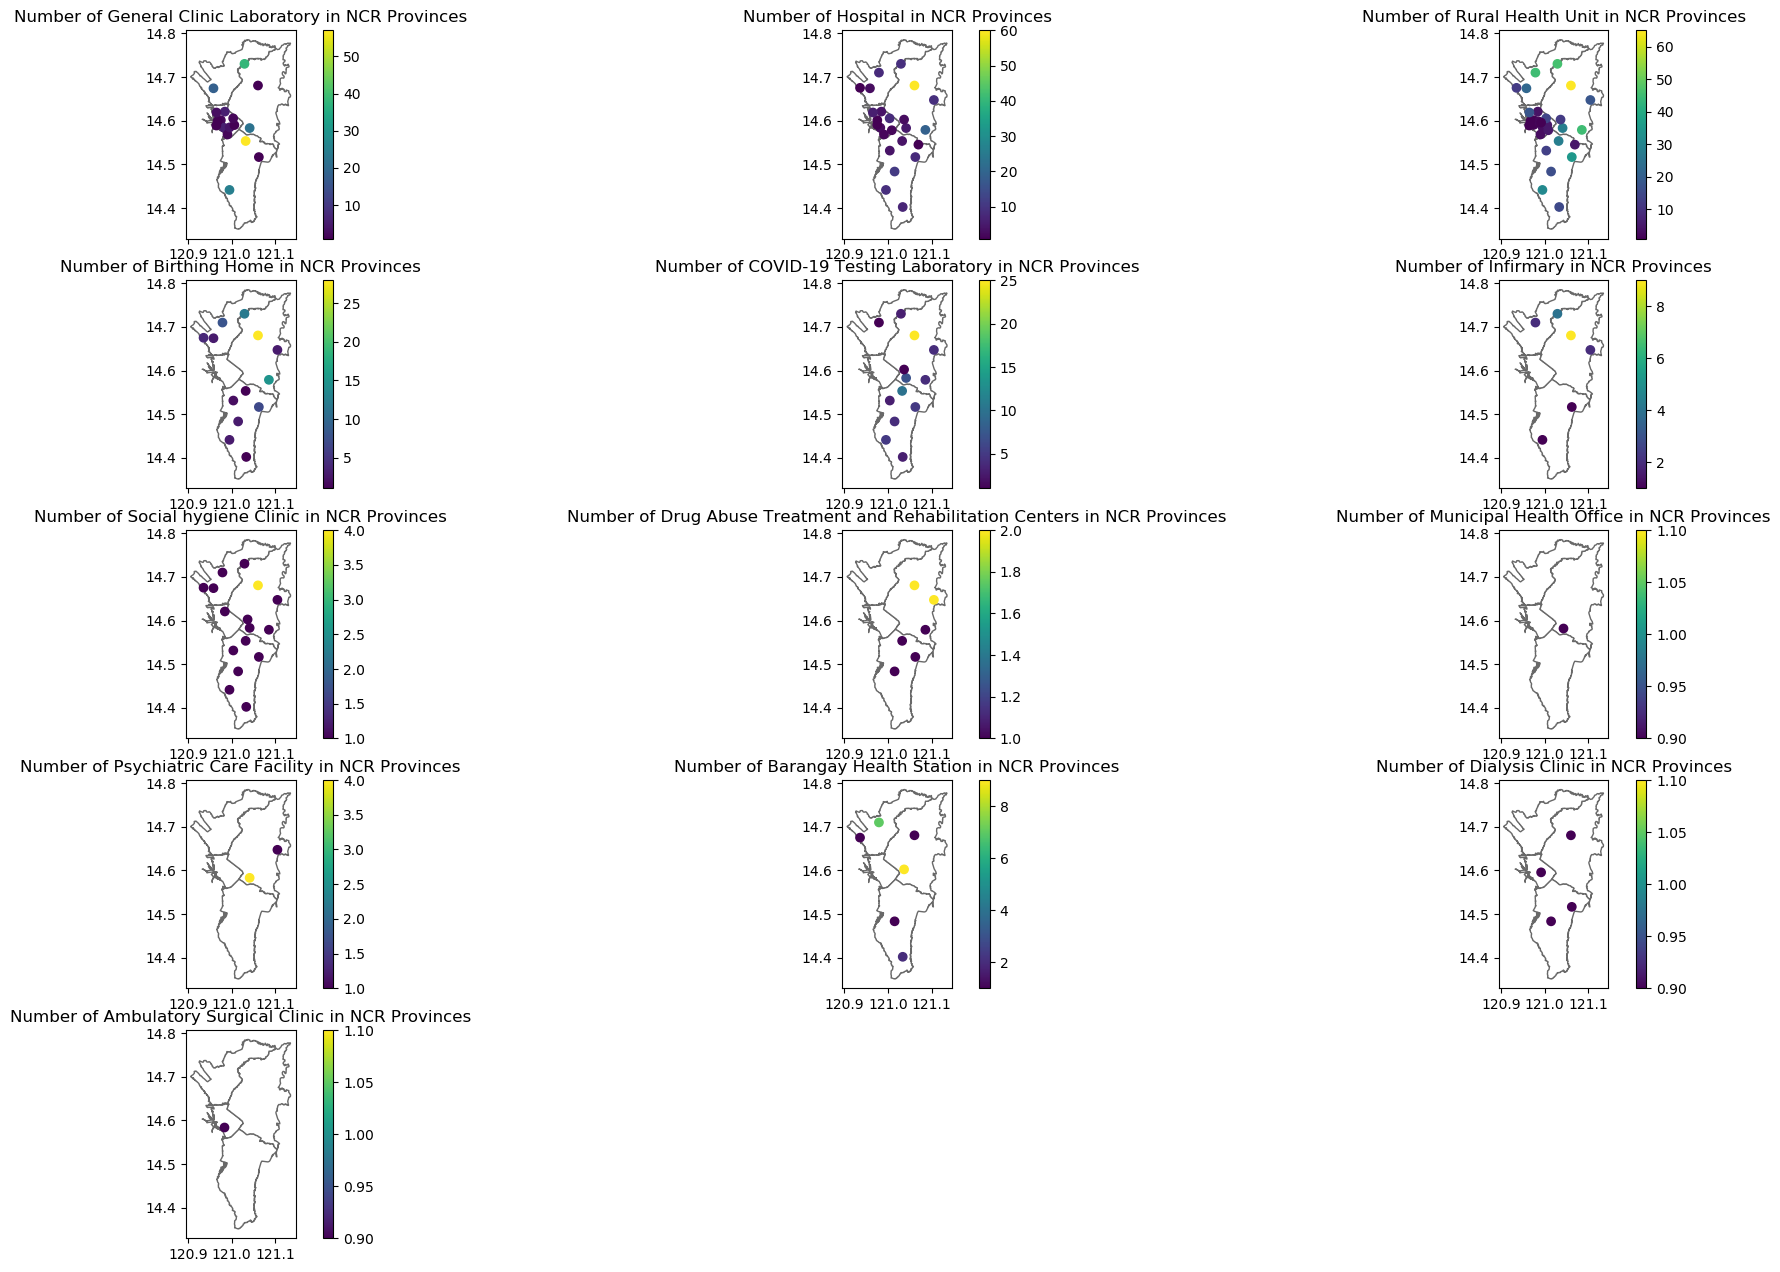

In [27]:
fig = plt.figure(figsize=(24, 16), dpi=100)
i = 1

for amenity in gdf_cities['Health Facility Type'].unique():
    ax = fig.add_subplot(5, 3, i)
    ax.set_title("Number of " + amenity + " in NCR Provinces", fontsize=12)
    gdf_provinces.plot(ax=ax, color='white', edgecolor='dimgray')
    
    gdf_cities[gdf_cities['Health Facility Type'] == amenity].plot(ax=ax, column="count", legend=True)
    i = i + 1
# fig.show()